In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [59]:
data=pd.read_csv("Mall_Customers.csv")

In [60]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [61]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [62]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
X = data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [65]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [67]:
data['Cluster'] = kmeans_model.labels_

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
silhouette_avg = silhouette_score(X_scaled, kmeans_model.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3427260372265036


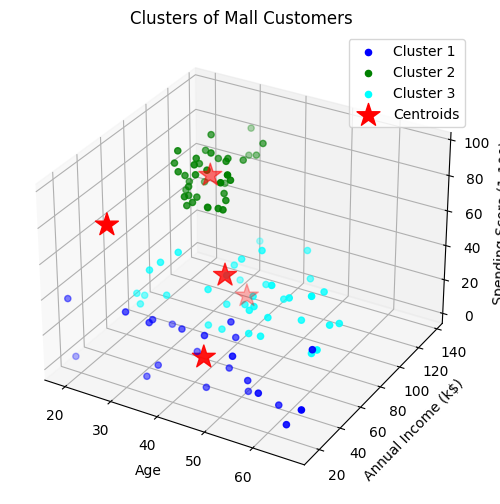

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'green', 'cyan']
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               c=colors[cluster], label=f'Cluster {cluster+1}')
ax.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], kmeans_model.cluster_centers_[:, 2],
           s=300, c='red', marker='*', label='Centroids')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Clusters of Mall Customers')
ax.legend()

plt.show()